In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [24]:
X_train[0].shape

(28, 28)

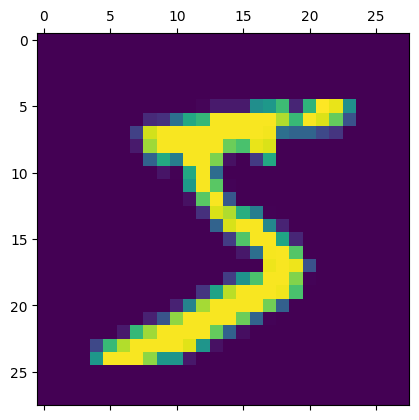

In [25]:
plt.matshow(X_train[0])

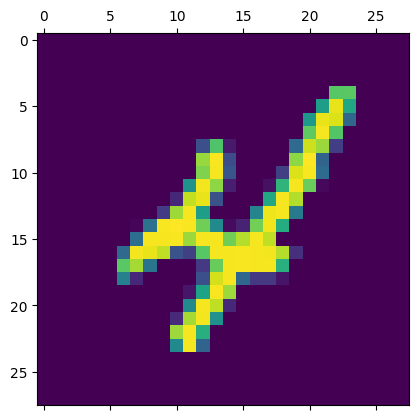

In [5]:
plt.matshow(X_train[9])

In [6]:
y_train[9]

4

In [7]:
y_train.shape

(60000,)

In [8]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)
X_train_flatten.shape

(60000, 784)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train_flatten)
X_train_scaled=scaler.transform(X_train_flatten)
scaler.fit(X_test_flatten)
X_test_scaled=scaler.transform(X_test_flatten)
X_train_scaled[0]
X_train_manual_scaled=X_train_flatten /255
X_test_manual_scaled=X_test_flatten /255

In [10]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
tb_callbacks=keras.callbacks.TensorBoard(log_dir='logs/adam',histogram_freq=1)
model.fit(X_train_scaled,y_train,epochs=5,callbacks=[tb_callbacks])

C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7317 - loss: 0.8591
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.2773
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9321 - loss: 0.2297
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9380 - loss: 0.2050
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9438 - loss: 0.1871


In [18]:
prediction=model.predict(X_test_scaled)
predict=[]
for i in prediction:
    argmax=np.argmax(i)
    predict.append(argmax)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
np.argmax(prediction[0])

7

<Axes: >

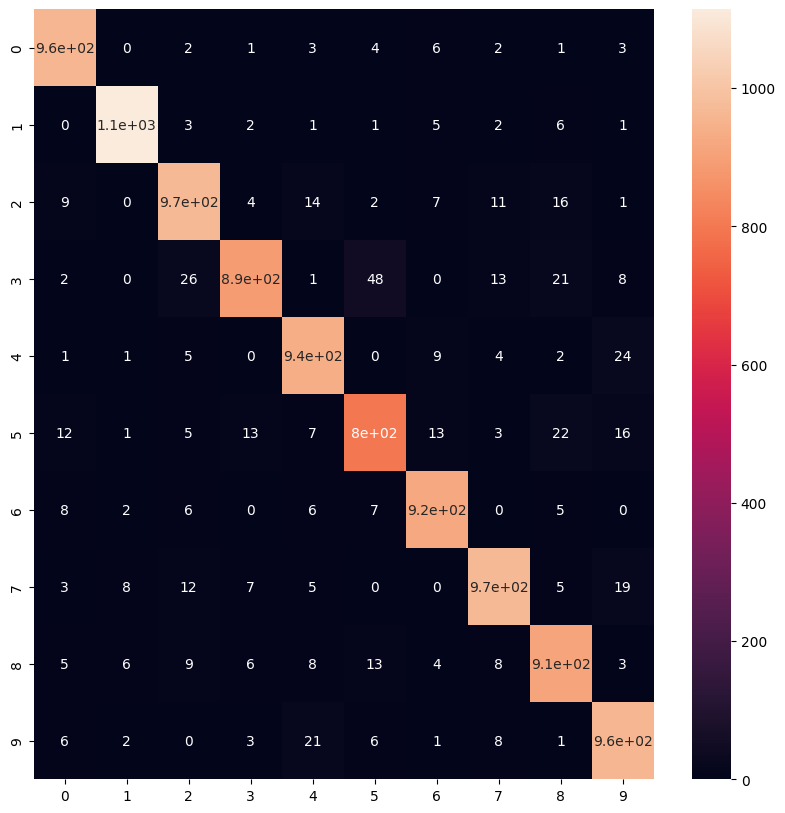

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test,predict)
sn.heatmap(cm,annot=True)

In [11]:
import cv2

In [ ]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    success,frame=cap.read()
    cv2.imshow('Hand Written Digit Recognition',frame)
    if cv2.waitKey(0) & 0XFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [23]:
numbers=[12,3,45,6]
numbers[-1]

6

In [27]:
model.save('handwritten_digits_recognition.keras')